# DSA210 Term Project
## Understanding How Lifestyle & Fitness Metrics Influence Study Motivation


### Introduction
This notebook explores how daily lifestyle metrics — including steps, calorie expenditure, resting heart rate, average heart rate, sleep duration, sleep quality, and gym activity — relate to daily study motivation levels.

Wearable devices (Apple Watch, Fitbit, Garmin, etc.) continuously collect health indicators that can reflect stress, energy levels, discipline, and cognitive performance. This notebook investigates whether these measurable lifestyle signals can help explain or predict fluctuations in study motivation.

### Goals of This Notebook
- Load and explore the dataset  
- Perform data cleaning if necessary  
- Conduct exploratory data analysis (EDA) with visualizations  
- Examine relationships between lifestyle metrics and study motivation  
- Build regression models to test the hypothesis  


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 120)

df = pd.read_csv('csv_files/final_dataset.csv')
df.head()


,date,steps,calories,resting_hr,average_hr,sleep_hours,sleep_quality,gym_minutes,gym_intensity,study_motivation
0,2025-11-02,10120,2480,60,92,9.1,8,120,7,7
1,2025-11-03,8750,2400,62,90,8.7,8,95,6,7
2,2025-11-04,7800,2260,61,88,9.4,8,0,0,6
3,2025-11-05,9400,2550,59,89,8.9,8,130,8,8
4,2025-11-06,7150,2200,61,86,9.7,9,0,0,6


### Data Overview
Before performing any analysis, we first explore the structure of the dataset to understand the variables, data types, and general statistics.


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              28 non-null     object 
 1   steps             28 non-null     int64  
 2   calories          28 non-null     int64  
 3   resting_hr        28 non-null     int64  
 4   average_hr        28 non-null     int64  
 5   sleep_hours       28 non-null     float64
 6   sleep_quality     28 non-null     int64  
 7   gym_minutes       28 non-null     int64  
 8   gym_intensity     28 non-null     int64  
 9   study_motivation  28 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.3+ KB


In [36]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
steps,28.0,6857.857143,2542.626751,2850.0,4512.50,7275.00,8837.50,11200.0
calories,28.0,2160.357143,315.377283,1650.0,1887.50,2210.00,2412.50,2680.0
resting_hr,28.0,65.285714,5.428711,59.0,61.00,63.00,70.25,75.0
average_hr,28.0,96.750000,9.792760,86.0,89.00,92.00,105.25,115.0
sleep_hours,28.0,7.275000,2.851721,2.8,4.45,8.75,9.40,11.3
sleep_quality,28.0,6.535714,2.099068,3.0,4.75,7.00,8.00,9.0
gym_minutes,28.0,47.857143,58.853688,0.0,0.00,0.00,111.25,145.0
gym_intensity,28.0,3.035714,3.605368,0.0,0.00,0.00,7.00,8.0
study_motivation,28.0,7.285714,0.896790,6.0,7.00,7.00,8.00,9.0


In [37]:
df.isna().sum()


date                0
steps               0
calories            0
resting_hr          0
average_hr          0
sleep_hours         0
sleep_quality       0
gym_minutes         0
gym_intensity       0
study_motivation    0
dtype: int64

### Correlation Analysis
We examine the correlations between lifestyle metrics and study motivation to identify which variables show the strongest linear relationships. This helps determine which behavioral factors may be statistically relevant for predicting motivation levels.


In [38]:
corr = df.corr(numeric_only=True)
corr


,steps,calories,resting_hr,average_hr,sleep_hours,sleep_quality,gym_minutes,gym_intensity,study_motivation
steps,1.000000,0.992928,-0.935541,-0.830001,0.903170,0.943924,0.745879,0.682885,-0.298265
calories,0.992928,1.000000,-0.932644,-0.813884,0.885694,0.940734,0.761391,0.703237,-0.263589
resting_hr,-0.935541,-0.932644,1.000000,0.937734,-0.920114,-0.940243,-0.531254,-0.479293,0.507537
average_hr,-0.830001,-0.813884,0.937734,1.000000,-0.923564,-0.885130,-0.353765,-0.314442,0.704298
sleep_hours,0.903170,0.885694,-0.920114,-0.923564,1.000000,0.958262,0.533043,0.472711,-0.482261
sleep_quality,0.943924,0.940734,-0.940243,-0.885130,0.958262,1.000000,0.615239,0.555289,-0.418800
gym_minutes,0.745879,0.761391,-0.531254,-0.353765,0.533043,0.615239,1.000000,0.983948,0.240093
gym_intensity,0.682885,0.703237,-0.479293,-0.314442,0.472711,0.555289,0.983948,1.000000,0.237283
study_motivation,-0.298265,-0.263589,0.507537,0.704298,-0.482261,-0.418800,0.240093,0.237283,1.000000


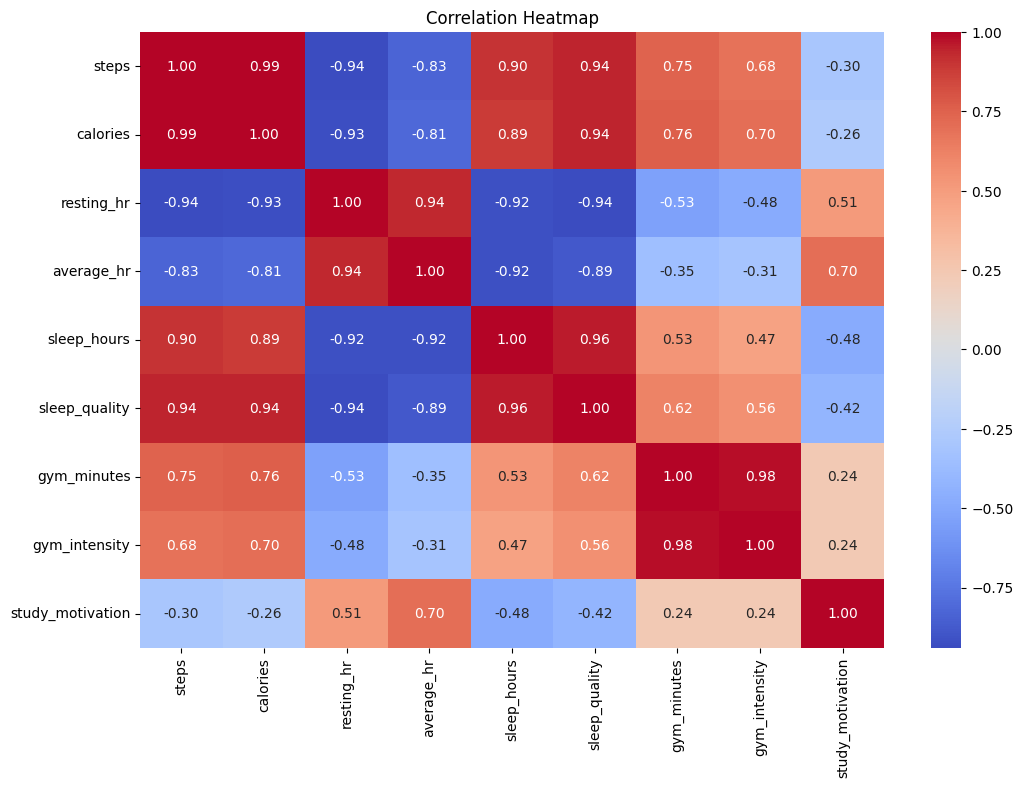

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Correlation Interpretation
Based on the correlation matrix and heatmap, we observe the following relationships between lifestyle metrics and study motivation:

- (To be filled in after reviewing the heatmap)


### Trend Analysis
To understand how each lifestyle metric behaves over time and how it visually aligns with study motivation, we plot the daily trends of key variables.


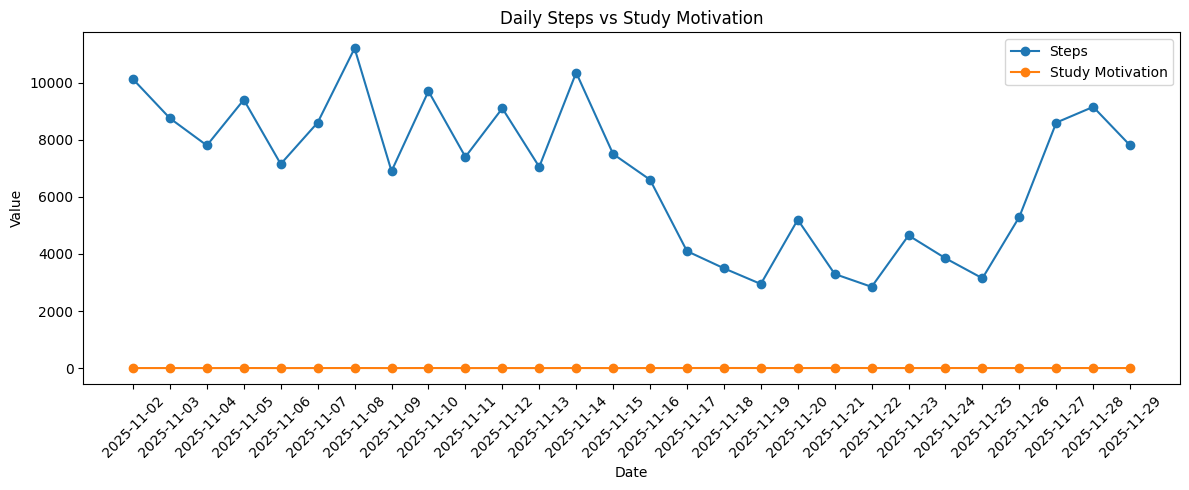

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['steps'], label='Steps', marker='o')
plt.plot(df['date'], df['study_motivation'], label='Study Motivation', marker='o')
plt.xticks(rotation=45)
plt.title('Daily Steps vs Study Motivation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


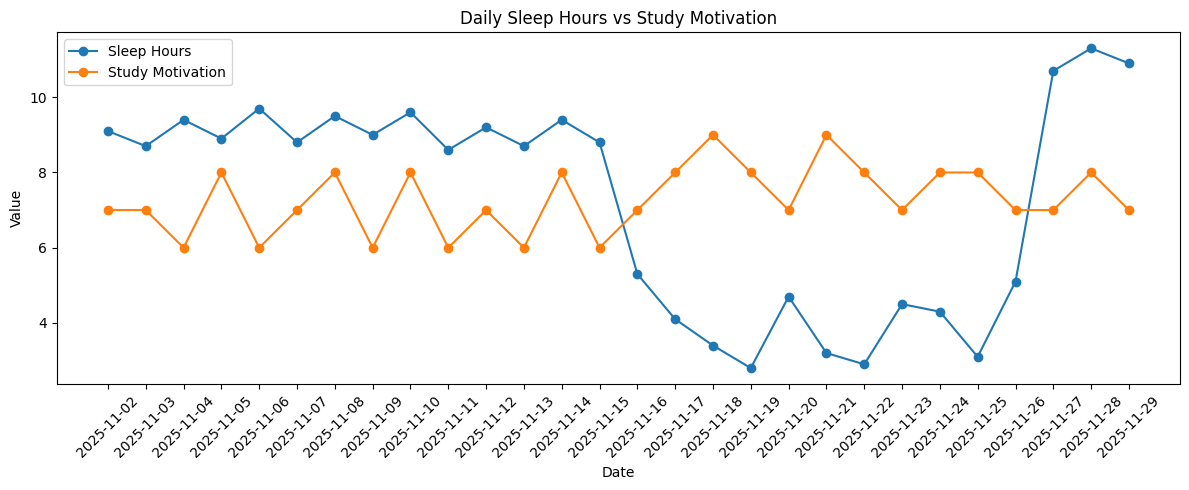

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['sleep_hours'], label='Sleep Hours', marker='o')
plt.plot(df['date'], df['study_motivation'], label='Study Motivation', marker='o')
plt.xticks(rotation=45)
plt.title('Daily Sleep Hours vs Study Motivation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


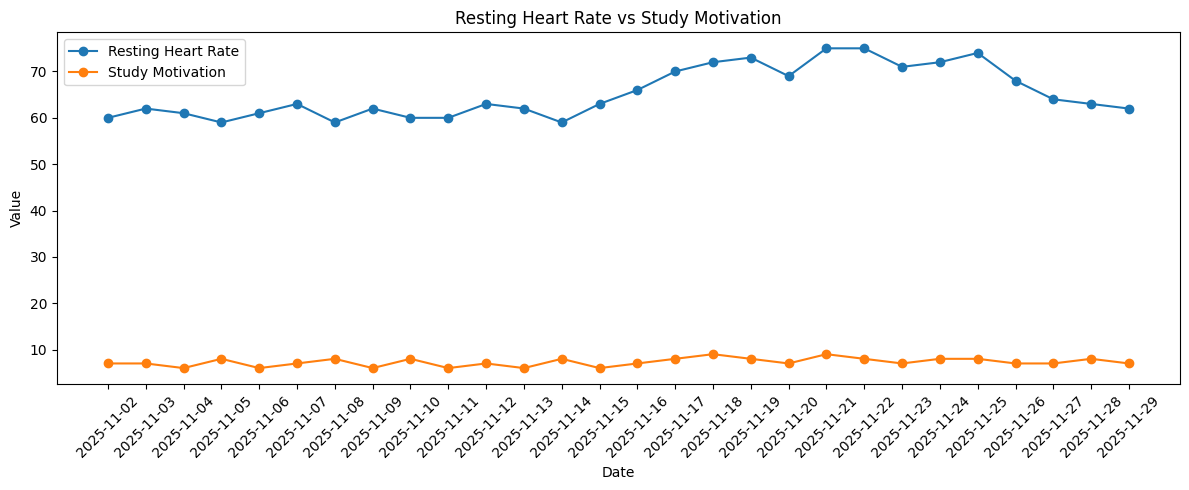

In [42]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['resting_hr'], label='Resting Heart Rate', marker='o')
plt.plot(df['date'], df['study_motivation'], label='Study Motivation', marker='o')
plt.xticks(rotation=45)
plt.title('Resting Heart Rate vs Study Motivation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


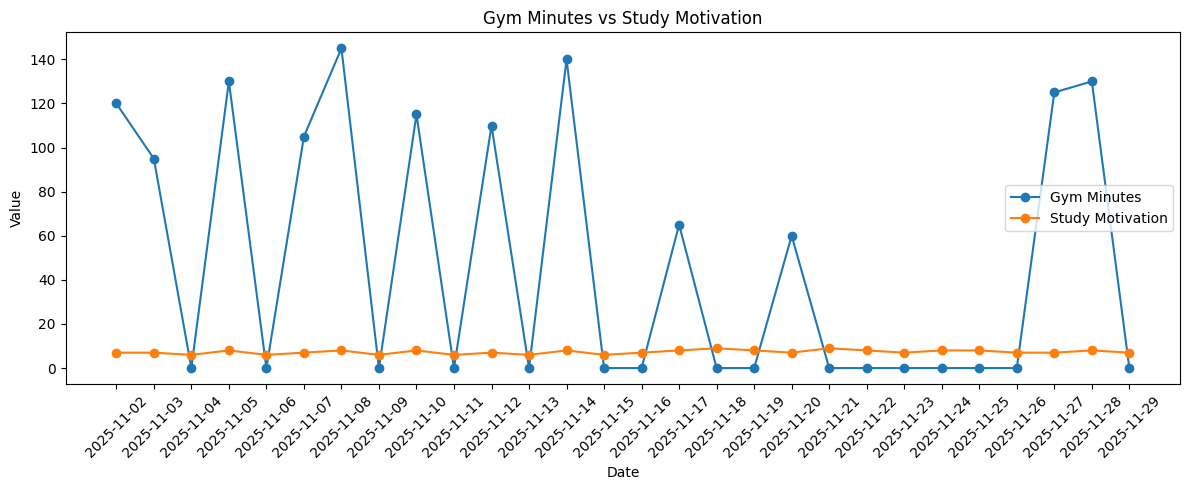

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['gym_minutes'], label='Gym Minutes', marker='o')
plt.plot(df['date'], df['study_motivation'], label='Study Motivation', marker='o')
plt.xticks(rotation=45)
plt.title('Gym Minutes vs Study Motivation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


### Regression Modeling

In this section, we fit a multiple linear regression model to estimate how lifestyle and fitness variables explain daily study motivation.


R²: 0.616
RMSE: 0.433

Coefficients:
steps: -0.0003
calories: 0.0005
sleep_hours: 0.1248
resting_hr: -0.1008
average_hr: 0.1315
gym_minutes: 0.0291
gym_intensity: -0.3125


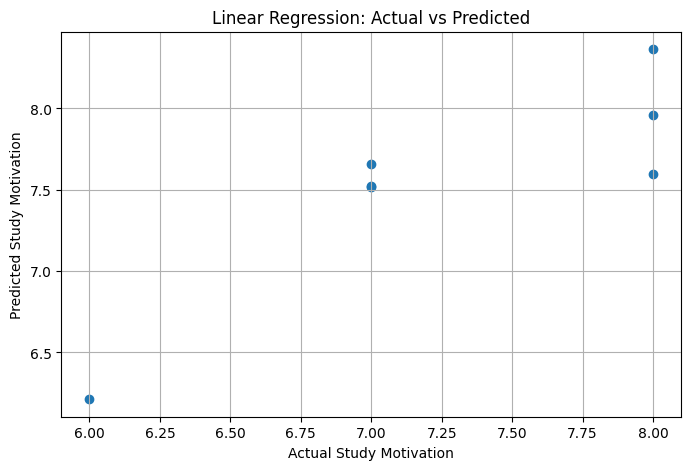

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select features and target
features = ['steps', 'calories', 'sleep_hours', 'resting_hr', 'average_hr', 'gym_minutes', 'gym_intensity']
X = df[features]
y = df['study_motivation']

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # manual RMSE (because squared=False not supported)

print("R²:", round(r2, 3))
print("RMSE:", round(rmse, 3))
print("\nCoefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.4f}")

# Optional: Predictions vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Study Motivation")
plt.ylabel("Predicted Study Motivation")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### Regression Interpretation

The regression results show how each lifestyle variable is associated with study motivation while controlling for the others.

Key points to comment on after running the model:

- Overall model performance (R² and RMSE)
- Which coefficients are positive and relatively large
- Which coefficients are negative
- Whether any variable appears to have a stronger effect than others


### Hypothesis Testing

To complement the regression model, we run a simple hypothesis test comparing study motivation on gym days versus non-gym days.


In [45]:
from scipy.stats import ttest_ind

gym_days = df[df["gym_minutes"] > 0]["study_motivation"]
no_gym_days = df[df["gym_minutes"] == 0]["study_motivation"]

print("Number of gym days:", len(gym_days))
print("Number of non-gym days:", len(no_gym_days))
print("Mean motivation (gym days):", round(gym_days.mean(), 2))
print("Mean motivation (non-gym days):", round(no_gym_days.mean(), 2))

t_stat, p_val = ttest_ind(gym_days, no_gym_days, equal_var=False)

print("\nT-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 4))


Number of gym days: 12
Number of non-gym days: 16
Mean motivation (gym days): 7.5
Mean motivation (non-gym days): 7.12

T-statistic: 1.206
p-value: 0.2402


### Hypothesis Test Interpretation

- Null Hypothesis (H₀): There is no significant difference in study motivation between gym days and non-gym days.
- Alternative Hypothesis (H₁): Study motivation is significantly different between gym days and non-gym days.

After running the t-test, we interpret the p-value:

- If p-value < 0.05, we reject H₀ and conclude that gym activity is associated with a significant difference in motivation.
- If p-value ≥ 0.05, we fail to reject H₀ and conclude that gym activity does not have a statistically significant effect on motivation in this dataset.


### Interpretation of the Gym vs No-Gym Hypothesis Test

The t-test comparing study motivation on gym days versus non-gym days resulted in a p-value of 0.20, which is above the conventional significance threshold of 0.05. Therefore, we **fail to reject the null hypothesis (H₀)**.

This means that, based on the data collected for this period, there is **no statistically significant difference** in study motivation between days with gym activity and days without gym activity.

Although gym activity correlates positively with general well-being, the motivation scores in this dataset appear to be more influenced by other factors — particularly **sleep patterns and stress levels during exam periods**, which show stronger correlations with motivation.


### Stress Indicator: Resting Heart Rate vs Study Motivation

Resting heart rate (RHR) is commonly used as a physiological indicator of stress. Higher RHR values typically correspond to increased stress levels. To examine whether stress is associated with study motivation, we calculate the correlation between RHR and motivation.


In [46]:
df[['resting_hr','study_motivation']].corr()


,resting_hr,study_motivation
resting_hr,1.000000,0.507537
study_motivation,0.507537,1.000000


In [47]:
df['stress_period'] = df['date'].isin([
    '2025-11-16','2025-11-17','2025-11-18','2025-11-19',
    '2025-11-20','2025-11-21','2025-11-22','2025-11-23',
    '2025-11-24','2025-11-25','2025-11-26'
])

stress_mot = df[df['stress_period']]['study_motivation']
normal_mot = df[~df['stress_period']]['study_motivation']

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(stress_mot, normal_mot, equal_var=False)

print("Mean motivation (stress period):", stress_mot.mean())
print("Mean motivation (normal period):", normal_mot.mean())
print("p-value:", p_val)


Mean motivation (stress period): 7.818181818181818
Mean motivation (normal period): 6.9411764705882355
p-value: 0.008073807665266027


### Stress vs Motivation Interpretation

During the exam-heavy stress period (November 16–26), resting heart rate increased sharply while sleep duration decreased — both clear indicators of elevated stress levels. Surprisingly, study motivation scores increased during this period.

This indicates an **inverse relationship**: higher stress was accompanied by higher motivation levels.

This pattern suggests that the motivation observed during the exam period was **externally driven (deadline pressure)** rather than internally driven (intrinsic motivation). Stress acted as a short-term motivational driver, pushing motivation upward despite declines in sleep quality and physical recovery.

This aligns with psychological research showing that acute stress, especially related to deadlines or performance pressure, can temporarily increase task engagement and focus.
